now bidirectional

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

# Paths
data_folder = "./time_sets_standardized"

# Load Data
def load_csv_data(folder_path):
    data, labels = [], []
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, file))
            features = df[["Latitude", "Longitude", "SOG", "COG", "Heading"]].values
            label = df["Navigational status"].iloc[0]  # Same for the whole file
            data.append(features)
            labels.append(label)
    return np.array(data), np.array(labels)

# Preprocess Data
def preprocess_data(data, labels):
    # Normalize features
    scaler = StandardScaler()
    data = np.array([scaler.fit_transform(d) for d in data])
    
    # Encode labels
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    return data, labels, label_encoder

# Load and preprocess
data, labels = load_csv_data(data_folder)
data, labels, label_encoder = preprocess_data(data, labels)

# Bidirectional LSTM Model
n_timesteps, n_features = data.shape[1], data.shape[2]
n_classes = len(np.unique(labels))

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(n_timesteps, n_features)),
    Dropout(0.2),
    Bidirectional(LSTM(64)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


2024-12-12 19:31:07.777800: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 19:31:07.779239: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 19:31:07.782762: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 19:31:07.791664: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734031867.806241   25003 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734031867.81

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.7499 - loss: 0.9958 - val_accuracy: 0.8667 - val_loss: 0.5196
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.8681 - loss: 0.5236 - val_accuracy: 0.8711 - val_loss: 0.5093
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8680 - loss: 0.5049 - val_accuracy: 0.8711 - val_loss: 0.4981
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8690 - loss: 0.4975 - val_accuracy: 0.8711 - val_loss: 0.5170
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.8737 - loss: 0.4474 - val_accuracy: 0.8622 - val_loss: 0.5224
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.8837 - loss: 0.4545 - val_accuracy: 0.8622 - val_loss: 0.4950
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 0.8797 - loss: 0.4281 - val_accuracy: 0.8578 - val_loss: 0.5358
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.8865 - loss: 0.3951 - val_accuracy: 0

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
Classification Report:
                            precision    recall  f1-score   support

        Engaged in fishing       1.00      0.09      0.17        11
                    Moored       0.00      0.00      0.00         2
Restricted maneuverability       0.35      0.44      0.39        16
         Under way sailing       0.00      0.00      0.00         1
    Under way using engine       0.90      0.94      0.92       195

                  accuracy                           0.85       225
                 macro avg       0.45      0.29      0.29       225
              weighted avg       0.85      0.85      0.83       225



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


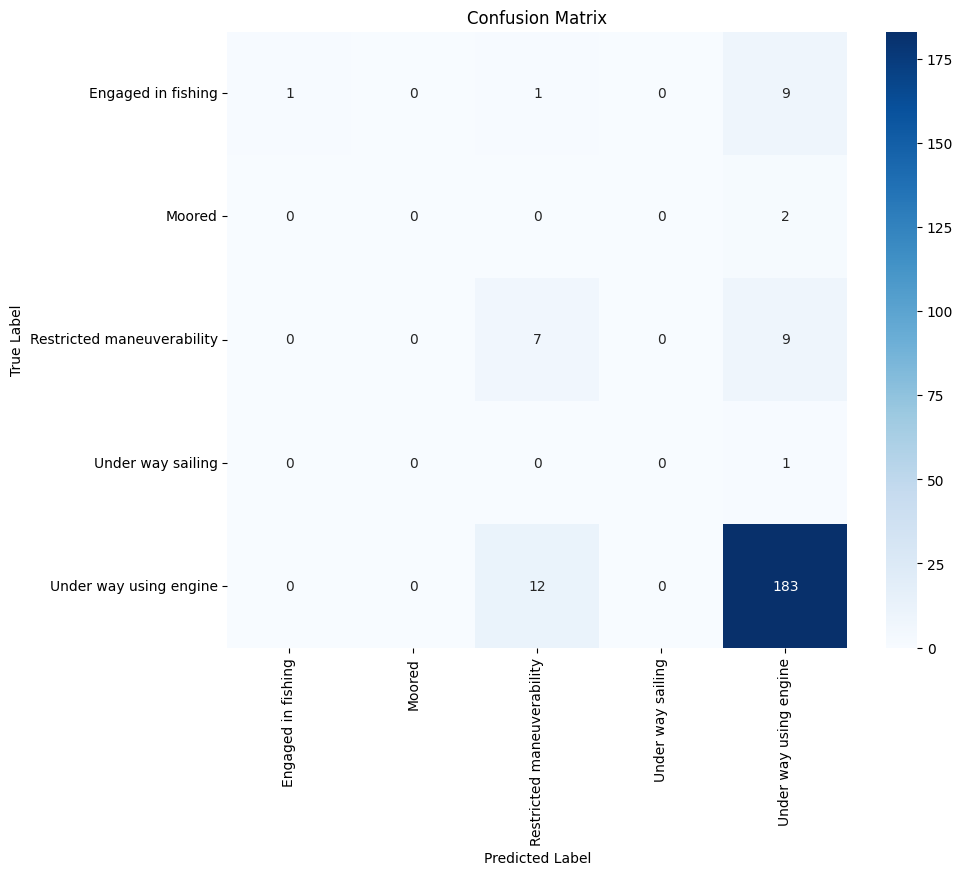

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.83


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall, F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average="weighted")
recall = recall_score(y_test, y_pred_classes, average="weighted")
f1 = f1_score(y_test, y_pred_classes, average="weighted")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
